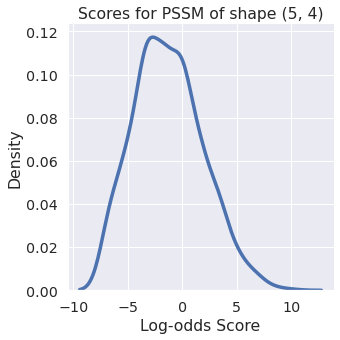

In [27]:
# Calculate distribution of all possible scores of a motif
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
import numpy as np
from scipy.stats import norm
%matplotlib inline

def density_plot(distribution, smoothness=0.5):

    sns.set_style("whitegrid")
    sns.set(font_scale=1.3)
    p = sns.displot(distribution, kind="kde", bw_adjust=smoothness, linewidth=3.5)
    p.set(xlabel="Log-odds Score", title=f"Scores for PSSM of shape {matrix.shape}")
    plt.tight_layout()
    plt.savefig('density_plot_matrix_scores.png')
    plt.show()
    
def calculate_all_possible_scores(matrix, smoothness):

    iterator = range(4)
    motif_len = len(matrix)

    cartesian_product = list(itertools.product(iterator, repeat=motif_len))

    scores = []
    for c in cartesian_product:
        score = 0
        for i, pos in zip(range(len(c)),c):
            x = matrix[i][pos]

            score += x
        scores.append(score)

    density_plot(scores, smoothness)  
    return scores


matrix = np.array([[2.14, -1.32, 0.26, -1.32],
                   [0.26, -1.32, 1.68, -1.32],
                   [-1.32, -1.32, -1.32, 2.14],
                   [2.14, -1.32, -1.32, -1.32],
                   [1.85, 0.26, -1.32, -1.32]], dtype="float16")

all_scores = calculate_all_possible_scores(matrix, 1.2)



def get_cdf_from_distribution(distribution, plot=False):
    mean = np.mean(distribution)
    std = np.mean(distribution)
    cdf = norm.cdf(distribution, mean, std)
    if plot:
        density_plot(distribution, smoothness=0.1)



cdf = get_cdf_from_distribution(all_scores)



[[-0.37726061 -0.91174917  1.16789334 -1.0169314 ]
 [ 1.54570362 -1.63893028 -1.66297576 -1.74411252]
 [-4.95212257  2.03357456 -4.82659169 -4.90772845]
 [-4.95212257 -4.80254621  2.00952909 -4.90772845]
 [ 1.8839982  -4.80254621 -4.82659169 -4.90772845]
 [-4.95212257  2.03357456 -4.82659169 -4.90772845]
 [-0.78996638 -2.05777004  1.59877583 -2.16295227]]
12.273049190211287


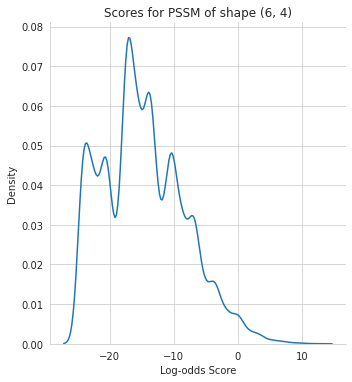

In [3]:
import math
#MOTIF ENSG00000115875 RNAcompete
#letter-probability matrix: alength= 4 w= 7

#pval: 5.61e-05; match:GACGACG
array = np.array([[0.203253094216, 0.126506578204, 0.543733751829, 0.126506578204],
                  [0.77073854682, 0.076420483562, 0.076420483562, 0.076420483562],
                  [0.00852837899557, 0.974414859209, 0.00852837899557, 0.00852837899557],
                  [0.00852837899557, 0.00852837899557, 0.974414859209, 0.00852837899557],
                  [0.974414859209, 0.00852837899557, 0.00852837899557, 0.00852837899557],
                  [0.00852837899557, 0.974414859209, 0.00852837899557, 0.00852837899557],
                  [0.152686398834, 0.0571645056273, 0.732984592797, 0.0571645056273]])

bg = [0.264,0.238,0.242, 0.256]
for i,nuc in enumerate(array.T):
    array.T[i] = np.log2(nuc/bg[i])
    
    
print(array)
score=0
match = np.array([3,1,2,3,1,2,3]) - 1

for i,line in enumerate(array):
    dig = match[i]
    score += array[i][dig]
    #print(array[i][dig])
    
print(score)

distribution = calculate_all_possible_scores(array, 0.9)

def score_to_pvalue(score):
    score = 2**score
    
    p = score/(score+1)

    return 1-p

#score_to_pvalue(score)
# 0.0000561

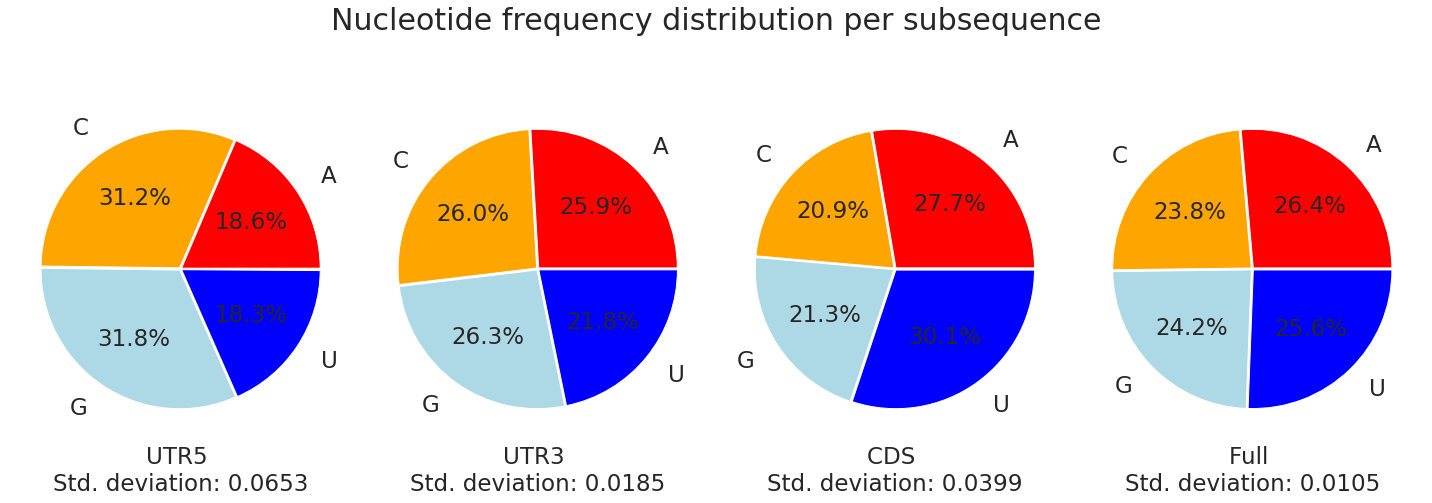

In [92]:
counter_dict = {7:90, 8:7}

def make_counter_into_barplot_data(counter_dict):
    ele_list = [int(x) for x in list(counter_dict.keys())]
    max_ele = np.max(ele_list)
    keys = np.arange(0, max_ele+(round(max_ele/3)), 1)
    values = [0 if x not in counter_dict.keys() else counter_dict[x] for x in keys]
    
    return keys, values

make_counter_into_barplot_data(counter_dict)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [0, 0, 0, 0, 0, 0, 0, 90, 7, 0, 0])